# Processamento de linguagem natural e modelo de an√°lise de sentimento.

A fim de que seja poss√≠vel comparar os t√≥picos abaixo descritos com os itens explicitados pelo barema, encontra-se, nessa c√©lula, um √≠ndice comparativo entre ambas partes. Ele foi feito para facilitar a corre√ß√£o dos professores e permitir a exist√™ncia de uma autonomia na nomenclatura das c√©lulas de organiza√ß√£o. 
- Instala√ß√£o -> t√≥pico 1.0
- Testes isolados - >  t√≥pico 3.8 
- Defini√ß√£o de fun√ß√µes -> t√≥pico 3.1 a 3.7
- Testes das fun√ß√µes -> t√≥pico 4.3
- An√°lise descritiva -> t√≥pico 2.0
- Pr√© processamento -> t√≥pico 3.0
- Pipeline -> t√≥pico 4.3
- Modelo Bag of words -> t√≥pico 4.0


## 1.0 Instala√ß√£o

Nessa parte do notebook realiza-se a instala√ß√£o das bibliotecas que ser√£o utilizadas no decorrer do c√≥digo, bem como a importa√ß√£o da base de dados que baseia todas as posteriores an√°lises. 

### 1.1 Importa√ß√£o das bibliotecas

In [ ]:
# instala√ß√£o de pacotes para remo√ß√£o de acentos
!pip install unidecode
# Instalando biblioteca Python "emoji"
!pip install emoji
# Instala√ß√£o de biblioteca para remo√ß√£o de stop words
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 235.9/235.9 kB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 353.7/353.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=8ad4bf4adb2e775aa1b77369d6d5d76c01f884a23f0f54ff3e5bfbe281cd7eb7
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
#importa√ß√£o das bibliotecas:
import pandas as pd
import numpy as np
# bibliotecas utilizadas para tokeniza√ß√£o
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#biblioteca para tokeniza√ß√£o 
from keras.preprocessing.text import Tokenizer
# bibliotecas utilizadas para remo√ß√£o de stop words
import nltk
nltk.download('punkt')
#importa√ß√£o das bibliotecas para remo√ß√£o de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')
nlp = spacy.load('pt_core_news_sm')
# bibliotecas para remo√ß√£o de acentos
from unidecode import unidecode
# bibliotecas utilizadas para o tratamento de abrevia√ß√µes
import re
# Instalando biblioteca Python "emoji"
import emoji
# importa√ß√£o de biblioteca para exporta√ß√£o do modelo
import pickle
# importa√ß√£o de biblioteca para separar treino e teste
from sklearn.model_selection import train_test_split
# importa√ß√£o do naive Bayes
from sklearn.naive_bayes import GaussianNB
# Importa√ß√£o de bibliotecas para revoca√ß√£o
from sklearn.metrics import recall_score
# importa√ß√£o de bilbioteca para matriz de confus√£o
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# importa√ß√£o de biblioteca para Word2Vec Skipgram
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### 1.2 Cria√ß√£o da tabela 

In [ ]:
#Conex√£o com o drive
from google.colab import drive
drive.mount('/content/drive')
#importa√ß√£o da base de dados:
df = pd.read_excel('/content/drive/MyDrive/Modulo_6_grupo_1/2-base_10052023-G1.xlsx')
novas_colunas = {
    '"dataPublicada"': 'dataPublicada',
    '"autor"': 'autor',
    '"texto"': 'texto',
    '"sentimento"': 'targetSentimento',
    '"tipoInteracao"': 'tipoInteracao',
    '"anomalia"': 'anomalia',
    '"probabilidadeAnomalia"': 'probabilidadeAnomalia',
    '"linkPost"': 'linkPost',
    '"processado"': 'processado',
    '"contemHyperlink"': 'contemHyperlink'
}

# Renomear as colunas
df = df.rename(columns=novas_colunas)
# Remover linhas sem a coluna "texto"
df = df.dropna(subset=['texto'])
# Filtrar as linhas com base em diferentes condi√ß√µes
df = df[(df['anomalia'] != 1) & (df['autor'] != 'btgpactual') & (df['contemHyperlink'] != 1) & (df['probabilidadeAnomalia'] <= 50)]
# Redefinir o √≠ndice
df = df.reset_index(drop=True)

Mounted at /content/drive


##### Balanceamento dos dados com undersampling

In [ ]:
# # Separa os elementos das classes POSITIVE, NEUTRAL e NEGATIVE em tr√™s tabelas
# df_classe1 = df.loc[df['sentimento'] == "POSITIVE"]
# df_classe2 = df.loc[df['sentimento'] == "NEUTRAL"]
# df_classe3 = df.loc[df['sentimento'] == "NEGATIVE"]

# # Mant√©m 988 elementos nas tabelas df_classe1 e df_classe2
# df_classe1 = df_classe1.sample(n=988, random_state=42)
# df_classe2 = df_classe2.sample(n=988, random_state=42)

# # Concatena as tr√™s tabelas em uma tabela df1
# df1 = pd.concat([df_classe1, df_classe2, df_classe3], ignore_index=True)

In [ ]:
# # Embaralha as linhas da tabela na vari√°vel df
# df = df1.sample(frac=1).reset_index(drop=True)

# # Exibe a tabela resultante
# df['sentimento']

## 2.0 An√°lise descritiva dos dados

A An√°lise Descritiva dos Dados √© uma t√©cnica importante para obter insights e compreender as caracter√≠sticas dos dados sem a utiliza√ß√£o de modelos estat√≠sticos complexos.

### 2.1 Colunas

C√©lula que permite a visualiza√ß√£o de todas as colunas do dataframe:

In [ ]:
df.columns

Index(['id', 'dataPublicada', 'autor', 'texto', 'targetSentimento',
       'tipoInteracao', 'anomalia', 'probabilidadeAnomalia', 'linkPost',
       'processado', 'contemHyperlink'],
      dtype='object')


1. **Coluna Id:** A coluna id apresenta o index para visualiza√ß√£o da planilha e pode ser usada como chave prim√°ria do coment√°rio. No que diz respeito √† utiliza√ß√£o no modelo, essa coluna n√£o confere relev√¢ncia para a sua constru√ß√£o, visto que sua utilidade est√° atrelada apenas ao fato de garantir que cada linha possua um identificador √∫nico. Portanto, *essa coluna n√£o ser√° utilizada.*

2. **Coluna dataPublicada:** A coluna data publicada refere-se a data de publica√ß√£o do coment√°rio. Para a constru√ß√£o do modelo **bag of words**, essa coluna n√£o apresenta relev√¢ncia, portanto, *n√£o ser√° utilizada*. Posteriormente, sua utiliza√ß√£o pode se fazer necess√°ria para a averigua√ß√£o dos per√≠odos das campanhas.

3. **Coluna autor:** A coluna autor √© referente √† conta do instagram que realizou o coment√°rio na postagem. Essa coluna n√£o ser√° utilizada diretamente pelo modelo bag of words, mas ser√° importante para o agrupamento de coment√°rios referente √† empresa BTG. 

4. **Coluna texto:** A coluna texto se refere ao texto presente no coment√°rio realizado. Para a constru√ß√£o do modelo, essa √© a coluna com maior relev√¢ncia, visto que s√£o justamente os conte√∫dos dos coment√°rios que precisam ser analisados pelo modelo. 

5. **Coluna sentimento:** A coluna sentimento √©, justamente, o target da classifica√ß√£o que precisamos fazer dos dados. Essa coluna ser√° utilizada para o treinamento posterior do modelo, visto que apresenta o resultado esperado. Contudo, diante de uma an√°lise manual das classifica√ß√µes, foi poss√≠vel perceber que alguns coment√°rios foram classificados de maneira err√¥nea, dado que possuem um teor positivo mas foram classificados como negativos ou neutros.

6. **Coluna tipoInteracao:** A coluna tipo intera√ß√£o informa o tipo de intera√ß√£o a qual aquele coment√°rio pertence, como, por exemplo, uma resposta ou como marca√ß√£o. Essa coluna, inicialmente, n√£o ser√° utilizada para a constru√ß√£o do modelo bag of words.

7. **Coluna anomalia:**  N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.

8. **Coluna probabilidadeAnomalia:**  N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.

9. **Coluna linkPost:** Essa coluna possui o link referente a postagem da qual foram retirados os coment√°rios. Todos os coment√°rios referentes √† mesma postagem possuem o link igual. Pensando na an√°lise de sentimento, essa coluna n√£o apresenta relev√¢ncia, portanto, n√£o ser√° utilizada. 

10. **Coluna processado:** N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.

11. **Coluna contemHyperlink:** N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.



### 2.2 Fun√ß√µes

Abaixo est√£o listadas todas as fun√ß√µes presentes nesse notebook e o que elas fazem:
1. **remocaoAcentos:** fun√ß√£o que remove todos os acentos presentes nos coment√°rios da coluna texto.
2. **tratamentoMaiusculas:** fun√ß√£o que trata todas as letras mai√∫sculas dos coment√°rios presentes na coluna texto, passando-as para caixa baixa.
3. **conversaoEmojis:** fun√ß√£o que converte todo emoji presente na coluna texto para seu significado em ingl√™s.
4. **tratamentoAbreviacoes:** fun√ß√£o que converte todas as abrevia√ß√µes para seu significado real, al√©m de remover todas as pontua√ß√µes e diferentes tipos de marca√ß√µes comumente utilizadas em redes sociais.
5. **tokenizacaoPalavra:** fun√ß√£o que tokeniza em palavras os coment√°rios, separando cada uma delas do todo.
6. **tokenizacaoFrase:** fun√ß√£o que tokeniza em frases os coment√°rios, separando cada uma das frases, sejam elas do mesmo coment√°rio ou de coment√°rios diferentes.
7. **remocaoStopWords:** fun√ß√£o que remove todas as stopwords presentes nos coment√°rios da coluna texto.
8. **bagOfWords:** fun√ß√£o para chamar o modelo de bag of words e salvar um vetor de recorrencia.
9. **pipelineBow:** fun√ß√£o que define a pipeline que ser√° utilizada no modelo, com todos os pr√©-processamentos realizados e o modelo BOW aplicado para gerar um dicion√°rio e um vetor.
10. **contarPalavras:** fun√ß√£o para contar quantas vezes cada palavra se repetiu no modelo bag of words.
11. **gerarNuvemPalavras:** fun√ß√£o para gerar uma nuvem de palavras utilizando os resultados do modelo bag of words.

###2.3 Visualiza√ß√£o gr√°fica de dados

#### 2.3.1 Valores nulos

Visualiza√ß√£o da propor√ß√£o entre o n√∫mero de linhas que possuem algum tipo de valor nulo e as linhas que n√£o os possuem. 

id                       0
dataPublicada            0
autor                    0
texto                    0
targetSentimento         0
tipoInteracao            0
anomalia                 0
probabilidadeAnomalia    0
linkPost                 0
processado               0
contemHyperlink          0
dtype: int64


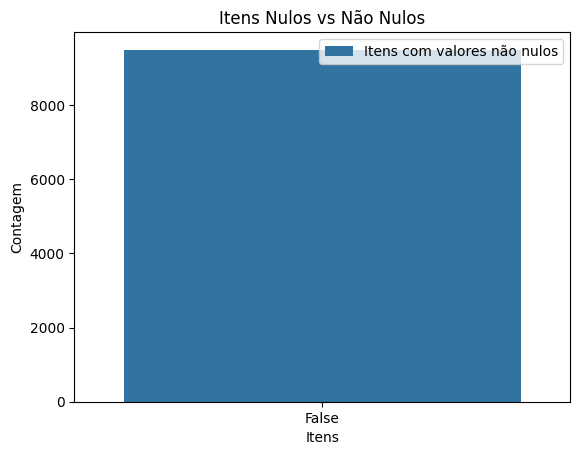

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# visualizando todos os itens nulos
print(df.isnull().sum())

# criando um gr√°fico de barras para comparar os itens nulos e n√£o nulos
sns.countplot(x=df.isnull().any(axis=1), hue=df.isnull().any(axis=1))
plt.title("Itens Nulos vs N√£o Nulos")
plt.xlabel("Itens")
plt.ylabel("Contagem")
plt.legend(labels=['Itens com valores n√£o nulos', 'Itens com valores nulos'])
plt.show()

Visualiza√ß√£o de √≠tens nulos em cada uma das colunas do dataframe:

In [ ]:
# contando os valores nulos em cada coluna
null_counts = df.isnull().sum()

# criando um gr√°fico de barras para mostrar a contagem de valores nulos em cada coluna
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90) # adicionando a rota√ß√£o de 90 graus nas legendas

# adicionando as etiquetas de texto no topo de cada barra
for i, v in enumerate(null_counts.values):
    plt.text(i, v+10, str(v), ha='center', fontsize=12)

# configurando os r√≥tulos dos eixos e o t√≠tulo do gr√°fico
plt.xlabel("Colunas")
plt.ylabel("Contagem de Valores Nulos")
plt.title("Contagem de Valores Nulos por Coluna")

# exibindo o gr√°fico
plt.show()

#### 2.2.2 Agrupamento por autores

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamento dos textos por autor, excluindo o "btg pactual"
textosPorAutor = df.query("autor != 'btgpactual'").groupby('autor')['texto'].count().reset_index()

# Ordena√ß√£o dos autores por quantidade de textos
textosPorAutor = textosPorAutor.sort_values('texto', ascending=False).reset_index(drop=True)

# Sele√ß√£o dos 10 autores com mais textos
top10Autores = textosPorAutor.head(10)

# Gr√°fico de barras com a quantidade de textos por autor
plt.bar(top10Autores['autor'], top10Autores['texto'])
plt.xticks(rotation=90)
plt.xlabel('Autor')
plt.ylabel('Quantidade de Textos')
plt.title('Top 10 Autores com Mais Textos (exceto btgpactual)')
plt.show()


### An√°lise dos sentimentos

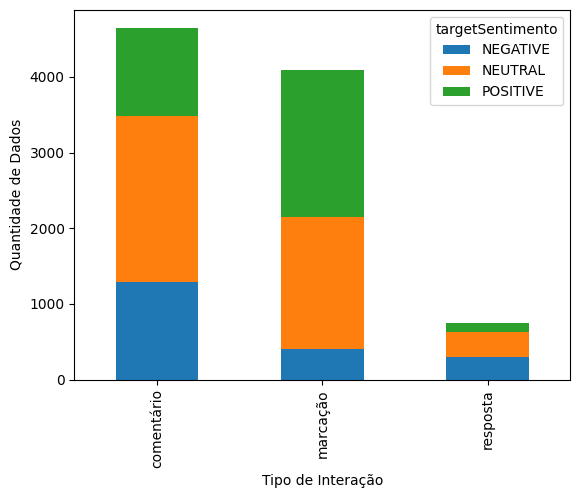

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a quantidade de dados para cada combina√ß√£o de marca√ß√£o e tipo de intera√ß√£o
contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# Criar o gr√°fico de barras agrupadas
contagem.plot(kind='bar', stacked=True)

# Configurar os r√≥tulos dos eixos
plt.xlabel('Tipo de Intera√ß√£o')
plt.ylabel('Quantidade de Dados')

# Exibir o gr√°fico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a quantidade de dados para cada combina√ß√£o de marca√ß√£o e tipo de intera√ß√£o
contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# Cores das colunas
cores = [ '#FF0000', '#C0C0C0', '#008000']

# Criar o gr√°fico de barras agrupadas com as cores personalizadas
contagem.plot(kind='bar', stacked=True, color=cores)

# Configurar os r√≥tulos dos eixos
plt.xlabel('Tipo de Intera√ß√£o')
plt.ylabel('Quantidade de Dados')

# Exibir o gr√°fico
plt.show()


## 3.0 Pr√© processamento dos dados

O pr√© processamento dos dados √© uma t√©cnica que consiste em uma s√©rie de etapas que buscam preparar os dados para uma an√°lise posterior, eliminando informa√ß√µes desnecess√°rias, corrigindo erros e padronizando o formato dos dados. 
Essa √© uma etapa muito importante porque, muitas vezes, dados textuais s√£o frequentemente n√£o estruturados, o que significa que n√£o seguem um formato padronizado ou organizado, dificultando a an√°lise e extra√ß√£o de informa√ß√µes relevantes.

### 3.1 Remo√ß√£o de acentos

Para garantir que um texto seja processado de forma consistente, √© importante realizar a normaliza√ß√£o dos seus componentes. Nesse sentido, a remo√ß√£o de acentos √© uma etapa fundamental, j√° que isso ajuda o algoritmo a compreender com mais precis√£o o que o texto est√° dizendo. Al√©m disso, a aus√™ncia de acentos reduz o risco de que o algoritmo interprete de maneira diferente duas palavras id√™nticas, mas que tenham sido acentuadas de formas distintas ou incorretas. Em resumo, a remo√ß√£o de acentos √© uma pr√°tica essencial no pr√©-processamento de textos para aprimorar a qualidade e a efic√°cia da an√°lise de dados em linguagem natural.

In [ ]:
#C√≥digo para remo√ß√£o dos acentos
def remocaoAcentos(dataframe):
    dataframe = dataframe.applymap(lambda x: unidecode(str(x)))
    return dataframe

Teste isolado

In [ ]:
# # Teste isolado da fun√ß√£o remo√ß√£o de acentos
# remocaoAcentos(df)

### 3.2 Remo√ß√£o letras maiusculas

O tratamento de letras mai√∫sculas √© importante porque, muitas vezes, a diferen√ßa entre letras mai√∫sculas e min√∫sculas pode impactar negativamente a an√°lise do algoritmo, tendo em vista que ele pode interpretar as palavras como diferentes em determinadas situa√ß√µes. Esse problema pode levar a resultados imprecisos, tendo em vista que, diante do objetivo de contar a frequ√™ncia de palavras, essas diferen√ßas garantem que as palavras sejam contadas de maneira distinta. 

In [ ]:
def tratamentoMaiusculas(dataframe):
    # Pr√©-processamento das letras mai√∫sculas
    dataframe = dataframe.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    # Exibi√ß√£o dos dados pr√©-processados
    return dataframe

Teste isolado

In [ ]:
# #teste isolado da fun√ß√£o tratamento Mai√∫sculas
# tratamentoMaiusculas(df)

### 3.3 Lematiza√ß√£o

A lematiza√ß√£o √© uma t√©cnica utilizada a fim de reduzir palavras flexionadas para sua forma b√°sica. Ela representa as palavras atrav√©s do infinitivo dos verbos e singular dos substantivos e adjetivos. Esse processo tamb√©m leva em considera√ß√£o o contexto inserido de cada palavra e resolve o problema da ambiguidade lexical, onde uma mesma palavra pode ter m√∫ltiplos significados.

In [ ]:
# Fun√ß√£o de lematiza√ß√£o
def textoLemmatizado(coluna):
    textosLemmatizados = []
    for texto in coluna:
        # Processa o texto com o modelo do Spacy
        doc = nlp(texto)
        # Lematiza cada token no documento
        lemmas = [token.lemma_ for token in doc]
        # Junta os lemmas em um √∫nico texto
        textoLemmatizado = ' '.join(lemmas)
        textosLemmatizados.append(textoLemmatizado)
    return textosLemmatizados

In [ ]:
# #Teste isolado:
# resultado = textoLemmatizado(df['texto'])
# resultado

### 3.4 Tratamento de emojis

Emojis s√£o muito utilizados por usu√°rios de redes sociais, ajudando-os, assim, a expressar emo√ß√µes e sentimentos. Portanto, para melhor entender o sentido de uma mensagem, o tratamento de emojis podem fornecer uma melhor precis√£o para a an√°lise e uma classifica√ß√£o mais precisa dos sentimentos de uma mensagem.

In [ ]:
# Fun√ß√£o para converter emojis em texto.
# A fun√ß√£o recebe dois argumentos. O dataframe e a coluna a ser tratada, e retorna o dataframe.
def conversaoEmojis(coluna):
    coluna = coluna.apply(emoji.demojize)
    return coluna

Teste isolado

In [ ]:
# # Teste isolado da fun√ß√£o converter emoji em texto
# conversaoEmojis(df['texto'])

### 3.5 Tratamento de abrevia√ß√µes e pontua√ß√µes

O tratamento de abrevia√ß√µes √© importante porque garante que o algoritmo de processamento de linguagem natural interprete corretamente o significado do texto. Ao substituir abrevia√ß√µes por suas formas completas, o texto se torna mais leg√≠vel e compreens√≠vel para o algoritmo que realizar√° o processamento.

In [ ]:
   
def tratamentoAbreviacoes(coluna):    
    coluna = coluna.astype(str)
    coluna.str.lower()
# Dicion√°rio com as abrevia√ß√µes e suas expans√µes
    abreviacoes = {
        r'\bvc\b': 'voc√™',
        r'\btbm\b': 'tamb√©m',
        r'\bpq\b': 'porque',
        r'\bmt\b': 'muito',
        r'\bmto\b':'muito',
        r'\bblz\b': 'beleza',
        r'\bjah\b': 'j√°',
        r'\bbj\b': 'beijo',
        r'\bflw\b': 'falou',
        r'\bvlw\b': 'valeu',
        r'\bkrl\b': 'caralho',
        r'\bqnd\b': 'quando',
        r'\bfds\b': 'fim de semana',
        r'\bqq\b': 'qualquer',
        r'\bmsg\b': 'mensagem',
        r'\bpra\b': 'para',
        r'\bp\b': 'para',
        r'\bpqp\b': 'puta que pariu',
        r'\bvlh\b': 'velho',
        r'\bnss\b': 'nossa',
        r'\bngm\b': 'ningu√©m',
        r'\bqm\b': 'quem',
        r'\bobs\b': 'observa√ß√£o',
        r'\bqt\b': 'quanto',
        r'\btbm √±\b': 'tamb√©m n√£o',
        r'\bpf\b': 'por favor',
        r'\bpdc\b': 'pode crer',
        r'\btalkei\b': 'ok',
        r'\bd+\b': 'demais',
        r'\bdms\b': 'demais',
        r'\bsqn\b': 's√≥ que n√£o',
        r'\bmsm\b': 'mesmo',
        r'\bn/ao\b': 'n√£o',
        r'\bn/\b': 'n√£o',
        r'\bblz\b': 'beleza',
        r'\bq\b': 'que',
        r'\btd\b': 'tudo',
        r'\bpfvr\b': 'por favor',
        r'\bgnt\b': 'gente',
        r'\bto\b': 'estou',
        r'\bvcs\b': 'voc√™s',
        r'\bn/oa\b': 'n√£o',
        r'\bsla\b': 'sei l√°',
        r'\bflws\b': 'falou',
        r'\bbjos\b': 'beijos',
        r'\bkd\b': 'cad√™',
        r'\blgl\b': 'legal',
        r'\bnum\b': 'n√∫mero',
        r'\bj√° q\b': 'j√° que',
        r'\bmano\b': 'irm√£o',
        r'\bpke\b': 'porque',
        r'\bpr\b': 'para',
        r'\btpm\b': 'tens√£o pr√©-menstrual',
        r'\bt√°\b': 'est√°',
        r'\bqmto\b': 'muito',
        r'\b√±\b': 'n√£o',
        r'\bvamu\b': 'vamos',
        r'\btmj\b': 'estamos juntos',
        r'[0-9]': '',
        r'@\w+': '',
        r'[^\w\s]': '',
        r'\bwww\.[^\s]*': '',
        r'\bola\b': '',
        r'\n': '',
        r'\bbtg\b': '',
        r'\bpactual\b': ''
    }

    # Aplica a substitui√ß√£o de cada abrevia√ß√£o no dataframe
    for abreviacao, expansao in abreviacoes.items():
        coluna= coluna.apply(lambda x: re.sub(abreviacao, expansao, x, flags=re.IGNORECASE))
    
    return coluna

Teste isolado:

In [ ]:
# #teste isolado
# tratamentoAbreviacoes(df['texto'])

### 3.6 Tokeniza√ß√£o

A tokeniza√ß√£o √© um processo de pr√©-processamento utilizado para dividir os valores de uma coluna em peda√ßos menores, como palavras ou frases. Cada peda√ßo, conhecido como token, recebe um valor espec√≠fico para identifica√ß√£o. Esse processo torna o texto mais gerenci√°vel e facilita a an√°lise e os processamentos subsequentes dos dados.

Fun√ß√£o para gerar um dicionario, com os tokens

In [ ]:
#defini√ß√£o de fun√ß√£o para tokeniza√ß√£o em palavras
def tokenizacaoPalavra(comentarios):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(comentarios)
  return tokenizer

Tokeniza√ß√£o por frase

In [ ]:
# defini√ß√£o de fun√ß√£o para tokeniza√ß√£o em frases
def tokenizacaoFrase(coluna):
  comentarios = coluna.values
  tokenFrase = []
  for comentarios in comentarios:
    tokenFrase.append(sent_tokenize(comentarios))
  return tokenFrase

Fun√ß√£o para gerar tokens de palavras, referentes a cada frase

In [ ]:
def tokenizar(coluna):
    # Tokeniza as frases
    tokensPalavras = nltk.word_tokenize(coluna)
    return tokensPalavras

Testes isolados:

Gera√ß√£o de dicionario.

In [ ]:
# tokenizacaoPalavra(df['texto'])

Tokenizando frases.

In [ ]:
# tokenizacaoFrase(df['texto'])

Tokenizando as palavras de cada post individualmente

In [ ]:
# resultado = df['texto'].apply(tokenizar)
# resultado

### 3.7 Remo√ß√£o de stopwords


A remo√ß√£o dos Stop Words √© um pr√©-processamento importante pois elimina palavras irrelevantes que podem prejudicar a precis√£o do modelo final, como artigos, preposi√ß√µes, conjun√ß√µes, entre outros conectores. Esse tratamento ajuda na efic√°cia da classifica√ß√£o de texto  e na redu√ß√£o tanto do vocabul√°rio quanto de ru√≠dos (palavras que n√£o t√™m um valor sem√¢ntico significativo).

In [ ]:
def remocaoStopWords(coluna):
    listaSemStopWords = []
    for texto in coluna:
        # converte o texto em um documento do Spacy
        doc = nlp(texto)
        # filtra os tokens que n√£o s√£o stop words
        tokenSemStopwords = [token.text for token in doc if not token.is_stop]
        # adiciona a lista de frases sem stop words
        listaSemStopWords.append(' '.join(tokenSemStopwords))
    # substitui a coluna original pelos textos sem stop words
    coluna[:] = listaSemStopWords
    return coluna

Teste isolado

In [ ]:
# remocaoStopWords(df['texto'])

### 3.8 Extra√ß√£o de hashtags

A extra√ß√£o de hashtags √© o processo de identificar e extrair hashtags de um texto. As hashtags s√£o palavras ou frases precedidas pelo s√≠mbolo "#" (hash) e s√£o comumente usadas em plataformas de m√≠dia social para categorizar e agrupar conte√∫do relacionado.

In [ ]:
# Fun√ß√£o para extrair as hashtags de um texto
def extrair_hashtags(text):
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

# Aplica√ß√£o da fun√ß√£o para extrair as hashtags em uma nova coluna
df['hashtags'] = df['texto'].apply(extrair_hashtags)

# Visualiza√ß√£o do resultado
print(df.head())

hashtags_lista = []  # Lista para armazenar as hashtags

# Percorrer os valores da coluna 'texto' e extrair as hashtags
for texto in df['texto']:
    hashtags = extrair_hashtags(texto)  # Chamar a fun√ß√£o extrair_hashtags
    hashtags_lista.extend(hashtags)  # Adicionar as hashtags √† lista

# Exibir as hashtags encontradas
print(hashtags_lista)

   id          dataPublicada          autor  \
0   2  "2022-03-04 09:29:00"  winthegame_of   
1   3  "2022-03-04 09:20:00"     marta_bego   
2   4  "2022-03-04 08:36:00"     lmviapiana   
3   5  "2022-03-03 21:10:00"   vanilson_dos   
4   6  "2022-03-03 20:54:00"    ricktolledo   

                                               texto targetSentimento  \
0  A Alvarez & Marsal estar√° conosco no Sportainm...          NEUTRAL   
1  #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...          NEUTRAL   
2                               Minuto touro de ouro         POSITIVE   
3                                   @ricktolledo Sim          NEUTRAL   
4  Queria saber se a Btg banking √© a pr√≥pria btg ...         POSITIVE   

  tipoInteracao  anomalia  probabilidadeAnomalia  \
0      marca√ß√£o         0                     43   
1      marca√ß√£o         0                     45   
2    coment√°rio         0                     38   
3      resposta         0                     17   
4   

### 3.9 Testes isolados

Teste isolado para fun√ß√£o de remo√ß√£o de acentos:

In [ ]:
remocaoAcentos(df)

Teste isolado para fun√ß√£o de tratamento de letras mai√∫sculas:

In [ ]:
tratamentoMaiusculas(df)

teste isolado para fun√ß√£o de convers√£o de emojis:

In [ ]:
conversaoEmojis(df['texto'])

Teste isolado para fun√ß√£o de tratamento de abrevia√ß√µes:

In [ ]:
tratamentoAbreviacoes(df['texto'])

Teste isolado para fun√ß√£o de gerar dicionario dos coment√°rios:

In [ ]:
tokenizacaoPalavra(df['texto'])

Teste isolado da fun√ß√£o de gerar tokens de cada comentario:

In [ ]:
resultado = df['texto'].apply(tokenizar)
resultado

Teste isolado para fun√ß√£o que remove stopwords:

In [ ]:
remocaoStopWords(df['texto'])

### 3.10 Pipeline dos pr√© processamentos

Cria√ß√£o de pipiline para tratamento dos dados.

In [ ]:
def pipeline(dados):
  #cria um novo df a ser tratado
  dadosT =  pd.DataFrame({'dadosTratados': dados})
  # remove os acentos dos dados
  dadosT['dadosTratados'] = remocaoAcentos(dadosT) 
  # substitui√ß√£o das letras maiusculas dos dados
  dadosT['dadosTratados'] = tratamentoMaiusculas(dadosT)
  ## tratamento dos emojis
  #dadosT = conversaoEmojis(dadosT)
  #tratamento de abrevia√ß√µes 
  dadosT['dadosTratados'] = tratamentoAbreviacoes(dadosT['dadosTratados'])
  ##tratamento de stopwords
  dadosT['dadosTratados'] = remocaoStopWords(dadosT['dadosTratados'])
  ## lemmatiza√ß√£o
  dadosT['dadosTratados'] = textoLemmatizado(dadosT['dadosTratados'])
  return dadosT['dadosTratados']

#### 3.9.1 Resultado dos pr√© processamentos.

Abaixo e p√≥ssivel ver o resultado dessa pipeline.

In [ ]:
dadosTratados = pipeline(df['texto'])
dadosTratados

0       alvarez    marsal estarar Conosco sportainmetr...
1       repost btgpactual With Make_repost    entendar...
2                                       minuto touro ouro
3                                                        
4                querer    banking proprio    administrar
                              ...                        
9482                           atendar telefone amor Deus
9483    voce sao    grande fiis mercado nao     seleci...
9484    erro financeiro eliminar    ano    parar osten...
9485    guadakan chegar    aula publico formato espeta...
9486       morning call nao aparecer spotify atualizar...
Name: dadosTratados, Length: 9487, dtype: object

Tamb√©m foi criada a v√°riavel "dadosTratados", que pode ser utilizada posteriormente para visualizar o resultado de essa pipeline.

#### 3.9.2 Exportando pr√© processamento

In [ ]:
dfTratado = pd.DataFrame({'texto': dadosTratados, 'targetSentimento': df['targetSentimento']})
dfTratado

texto targetSentimento
0     alvarez    marsal estarar Conosco sportainmetr...          NEUTRAL
1     repost btgpactual With Make_repost    entendar...          NEUTRAL
2                                     minuto touro ouro         POSITIVE
3                                                                NEUTRAL
4              querer    banking proprio    administrar         POSITIVE
...                                                 ...              ...
9482                         atendar telefone amor Deus         POSITIVE
9483  voce sao    grande fiis mercado nao     seleci...         POSITIVE
9484  erro financeiro eliminar    ano    parar osten...          NEUTRAL
9485  guadakan chegar    aula publico formato espeta...          NEUTRAL
9486     morning call nao aparecer spotify atualizar...         NEGATIVE

[9487 rows x 2 columns]

In [ ]:
dfTratado.to_csv('resultadoTratamento.csv', index=False)

##4.0 Vetoriza√ß√£o com Bag of words

O modelo de bag of words (ou, em tradu√ß√£o literal, saco de palavras) √© uma representa√ß√£o que transforma texto em vetores de tamanho fixo para contar quantas vezes as palavras aparecem nas frases em quest√£o. Esse m√©todo √© comumente chamado de **vetoriza√ß√£o**.

### 4.1 Setup do modelo

In [ ]:
#importa√ß√£o de bibliotecas
#importa√ß√£o de keras, para execu√ß√£o do modelo e cria√ß√£o do dicionario
from keras.preprocessing.text import Tokenizer

#### 4.1.1 Defini√ß√£o de fun√ß√µes


fun√ß√£o para cria√ß√£o dos vetores:


In [ ]:
#fun√ß√£o para chamar o modelo de bag of words, e salvar um vetor de recorrencia.
def bagOfWords(tokens,comentarios):
  salvar = tokens.texts_to_matrix(comentarios, mode='count')
  return salvar

###4.2 Execu√ß√£o do modelo


##### 4.2.1 Teste do modelo de bag of words

Nesse momento √© chamada a fun√ß√£o bag of words para realiza√ß√£o do teste da fun√ß√£o.

In [ ]:
bagOfWords(tokenizacaoPalavra(df['texto']),df['texto'])

array([[0., 1., 3., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 6., 2., ..., 0., 0., 0.],
       [0., 6., 7., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

Como √© poss√≠vel visualizar pelo resultado, com o modelo, conseguimos obter como retorno uma matriz com o n√∫mero de repeti√ß√µes de cada palavra presente no dicion√°rio.

###4.3 Modelo Bag of Words

Abaixo √© poss√≠vel ver a fun√ß√£o que define a pipeline que ser√° utilizada no modelo, com todos os pr√©-processamentos realizados e o modelo BOW aplicado para gerar um dicion√°rio e um vetor.

In [ ]:
def modeloBow(dados):
  #Recebe os dados a ser realizado o BOW
  dadosTratados = pipeline(dados)
  #cria um novo df a ser tratado
  dadosT =  pd.DataFrame({'dadosBow': dadosTratados})
  #tokeniza√ß√£o/gera√ß√£o de dicionario
  dicionario = tokenizacaoPalavra(dadosT['dadosBow'])
  # chamando o modelo de bag of words, usando dados_t e o dicionario criado com a tokeniza√ß√£o
  modelo = (bagOfWords(dicionario,dadosT['dadosBow']))
  return modelo,dicionario

Abaixo √© poss√≠vel ver o resultado da execu√ß√£o da fun√ß√£o pipeline:

In [ ]:
#execu√ß√£o do modelo, e salvamento de variaveis
vetor,dicionario = (modeloBow(df['texto']))
dicionario = list(dicionario.word_index.keys())
print(dicionario)
print(vetor)

['btgpactual', 'nao', 'investimento', 'voce', 'banco', 'dia', 'mercado', 'ano', 'bom', 'financeiro', 'evento', 'ja', 'sao', 'brasil', 'fundo', 'so', 'cliente', 'hoje', 'empresa', 'contar', 'ser', 'tambem', 'r', 'time', 'acoes', 'ir', 'economia', 'taxa', 'ate', 'dinheiro', 'investir', 'ficar', 'pessoa', 'paulo', 'falar', 'ativo', 'semana', 'estar', 'bio', 'vida', 'fazer', 'negocio', 'oportunidade', 'investidor', 'ajudar', 'mercadofinanceiro', 'inflacao', 'aler', 'selic', 'de', 'futuro', 'compra', 'linkr', 'equipe', 'trabalho', 'ter', 'link', 'estao', 'parabem', 'fiis', 'politico', 'participar', 'cartao', 'incrivel', 'email', 'copom', 'importante', 'principal', 'la', 'sucesso', 'repost', 'passar', 'junto', 'resultado', 'mulher', 'mundo', 'conseguir', 'dar', 'abrir', 'credito', 'seguir', 'acontecer', 'cenario', 'brasileiro', 'alto', 'completo', 'realizar', 'especial', 'precisar', 'relatorio', 'parceiro', 'parceria', 'muito', 'conta', 'atendimento', 'mes', 'trader', 'pesquisa', 'gente', 'a

#### 4.3.1 Cria√ß√£o de dataframe com resultado final

Nesse dataframe encontra-se o resultado obtido ap√≥s a execu√ß√£o da fun√ß√£o pipeline.

In [ ]:
#adequa√ß√£o do vetor                                                                                                               #adequando o tamanho do vetor
vetorTabela = vetor[:, 1:]
#criando data frame
dfBagOfWords = pd.DataFrame(vetorTabela, columns=dicionario, index=dadosTratados)
dfBagOfWords

btgpactual  nao  \
dadosTratados                                                         
alvarez    marsal estarar Conosco sportainmetr ...         1.0  0.0   
repost btgpactual With Make_repost    entendar ...         1.0  1.0   
minuto touro ouro                                          0.0  0.0   
                                                           0.0  0.0   
querer    banking proprio    administrar                   0.0  0.0   
...                                                        ...  ...   
atendar telefone amor Deus                                 0.0  0.0   
voce sao    grande fiis mercado nao     selecio...         1.0  2.0   
erro financeiro eliminar    ano    parar ostent...         2.0  5.0   
guadakan chegar    aula publico formato espetac...         1.0  1.0   
   morning call nao aparecer spotify atualizar ...         0.0  1.0   

                                                    investimento  voce  banco  \
dadosTratados                                                                   
alvarez    marsal estarar Conosco sportainmetr ...           0.0   0.0    0.0   
repost btgpactual With Make_repost    entendar ...           0.0   0.0    0.0   
minuto touro ouro                                            0.0   0.0    0.0   
                                                             0.0   0.0    0.0   
querer    banking proprio    administrar                     0.0   0.0    0.0   
...                                                          ...   ...    ...   
atendar telefone amor Deus                                   0.0   0.0    0.0   
voce sao    grande fiis mercado nao     selecio...           0.0   1.0    0.0   
erro financeiro eliminar    ano    parar ostent...           1.0   0.0    0.0   
guadakan chegar    aula publico formato espetac...           0.0   1.0    0.0   
   morning call nao aparecer spotify atualizar ...           0.0   0.0    0.0   

                                                    dia  mercado  ano  bom  \
dadosTratados                                                                
alvarez    marsal estarar Conosco sportainmetr ...  0.0      0.0  0.0  0.0   
repost btgpactual With Make_repost    entendar ...  0.0      0.0  0.0  0.0   
minuto touro ouro                                   0.0      0.0  0.0  0.0   
                                                    0.0      0.0  0.0  0.0   
querer    banking proprio    administrar            0.0      0.0  0.0  0.0   
...                                                 ...      ...  ...  ...   
atendar telefone amor Deus                          0.0      0.0  0.0  0.0   
voce sao    grande fiis mercado nao     selecio...  0.0      1.0  0.0  0.0   
erro financeiro eliminar    ano    parar ostent...  0.0      0.0  2.0  0.0   
guadakan chegar    aula publico formato espetac...  1.0      0.0  1.0  0.0   
   morning call nao aparecer spotify atualizar ...  3.0      0.0  0.0  0.0   

                                                    financeiro  ...  anotem  \
dadosTratados                                                   ...           
alvarez    marsal estarar Conosco sportainmetr ...         0.0  ...     0.0   
repost btgpactual With Make_repost    entendar ...         0.0  ...     0.0   
minuto touro ouro                                          0.0  ...     0.0   
                                                           0.0  ...     0.0   
querer    banking proprio    administrar                   0.0  ...     0.0   
...                                                        ...  ...     ...   
atendar telefone amor Deus                                 0.0  ...     0.0   
voce sao    grande fiis mercado nao     selecio...         0.0  ...     0.0   
erro financeiro eliminar    ano    parar ostent...         2.0  ...     0.0   
guadakan chegar    aula publico formato espetac...         0.0  ...     1.0   
   morning call nao aparecer spotify atualizar ...         0.0  ...     0.0   

                               

#### 4.3.2 Exporta√ß√£o do resultado

Abaixo, √© poss√≠vel ver a gera√ß√£o de um arquivo csv, com o resultado do modelo:

In [ ]:
#Cria√ß√£o de csv com resultado do modelo
dfBagOfWords.to_csv('resultadoBOW.csv', index=False)

KeyboardInterrupt: ignored

### 4.4 Representa√ß√£o visual

##### 4.4.1 Tabela de frequ√™ncia

Defini√ß√£o de fun√ß√£o para contar quantas vezes cada palavra se repetiu.

In [ ]:
#c√≥digo para gerar a matriz de repeti√ß√£o das palavras
def contarPalavras(dicionario, matriz):
    dicionario = [''] + dicionario
    contagemPalavras = [0] * len(dicionario)
    for i, palavra in enumerate(dicionario):
        for j in range(len(matriz)):
            contagemPalavras[i] += matriz[j][i]
    contagemDf = pd.DataFrame({'palavra': dicionario, 'repeti√ß√£o': contagemPalavras})
    return contagemDf.iloc[1:]


Chamando a fun√ß√£o para "contarPalavras", para gerar uma tabela

In [ ]:
tabela = contarPalavras(dicionario, vetor)

Abaixo √© poss√≠vel visualizar quantas vezes cada palavra estava presente nos coment√°rios fornecidos.

In [ ]:
tabela.head(10)

##### 4.4.2 N√∫vem de palavras

A nuvem de palavras foi utilizada como representa√ß√£o visual das palavras mais relevantes dos coment√°rios analisados, nela o tamanho de cada palavra √© proporcional √† frequ√™ncia em que ele aparece. Ela contribui com modelo de bow ao destacar os termos-chave e a resumir rapidamente o conte√∫do mais expressivo dos coment√°rios.

##### 4.4.2.1 setup

In [ ]:
#bibliotecas utilizadas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##### 4.4.2.2 Defini√ß√£o da fun√ß√£o

Definindo fun√ß√£o que ira gerar a nuvem de palavras

In [ ]:
#defini√ß√£o da fun√ß√£o
def gerarNuvemPalavras(matrizRec, vocabulario):
    # Cria um dicion√°rio com as palavras do vocabul√°rio e suas frequ√™ncias na matriz de recorr√™ncia
    freqPalavras = dict(zip(vocabulario, matrizRec.sum(axis=0)))
    
    # Cria uma inst√¢ncia da classe WordCloud com as configura√ß√µes desejadas
    nuvemPalavras = WordCloud(width=8000, height=4000, background_color='white', colormap='viridis')
    
    # Gera a nuvem de palavras a partir do dicion√°rio de frequ√™ncias
    nuvemPalavras.generate_from_frequencies(freqPalavras)
    
    # Exibe a nuvem de palavras
    plt.figure(figsize=(12,6))
    plt.imshow(nuvemPalavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

##### 4.4.2.4 Visualiza√ß√£o

Abaixo e possivel visualizar a nuvem de palavras:

In [ ]:
gerarNuvemPalavras(vetor, dicionario)

## 5.0 Vetoriza√ß√£o com Word2vec pr√©-treinado

O Word2Vec √© um modelo utilizado para aprender representa√ß√µes distribu√≠das de palavras. Ele mapeia palavras em vetores cont√≠nuos de valores reais em um espa√ßo vetorial de alta dimens√£o, onde palavras semanticamente similares s√£o mapeadas para regi√µes pr√≥ximas.


Esse modelo √© pr√©-treinado em um grande corpus de textos com o objetivo de capturar a sem√¢ntica distribucional das palavras. O treinamento permite que palavras com significados semelhantes possam ser representadas de modo pr√≥ximo no espa√ßo vetorial.

A utiliza√ß√£o de vetores de palavras pr√©-treinados com o Word2Vec traz benef√≠cios, pois aproveita o conhecimento pr√©vio adquirido durante o treinamento em um corpus amplo. Isso √© especialmente √∫til quando temos um conjunto de dados limitado para treinar um modelo do zero.

Refer√™ncias:
[Estudo Comparativo dos M√©todos de Word Embedding na
An√°lise de Sentimentos](https://www.cin.ufpe.br/~tg/2018-2/TG_CC/tg_mhc.pdf)

### 5.1 Setup do modelo

In [ ]:
#setup
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

In [ ]:
#Carregando o modelo
modelo_cbow = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Modulo_6_grupo_1/cbow_s50.txt")

### 5.2 Defini√ß√£o de fun√ß√µes

In [ ]:
def word2Vec(coluna):
# lista que armazena os vetores resultantes de todas as frases
  x = []
  for i in range(0,len(coluna)):
# lista que armazena os vetores das palavras de cada frase
    vetor = []
    for h in range(0,len(coluna[i])):
      vetor.append(modelo_cbow[h])
# soma dos vetores de todas as palavras 
    x.append(list(map(sum, zip(*vetor))))
    vetor=[]
  print(x)
  return x

### 5.3 Testes das fun√ß√µes

In [ ]:
# chama a fun√ß√£o Word2Vec para test√°-la
testeword2Vec = word2Vec(df['texto'].apply(tokenizar))
#cria√ß√£o de um Dataframe para visualizar o resultado
dfTesteword2Vec = pd.DataFrame(testeword2Vec)
dfTesteword2Vec

KeyboardInterrupt: ignored

### 5.4 Teste isolado

Esses teste tem como objetivo comprovar que os vetores est√£o sendo corretamente somados

O codigo abaixo ainda n√£o soma os vetores de cada palvra da frase

In [ ]:
#teste que converte palavras em vetores e retorna uma lista de vetores resultantes
def word2Vecteste(coluna):
#armazena os vetores resultantes
  x = []
  for i in range(0,len(coluna)):
    vetor = []
#armazena todos os vetores de todas as palavras
    for h in range(0,len(coluna[i])):
      vetor.append(modelo_cbow[h])
    x.append(vetor)
    vetor=[]
  print(x)
  return x

Abaixo esta sendo executado o teste da fun√ß√£o

In [ ]:
# gera os vetores das 10 primeiras frases
testeSoma = word2Vecteste(df['texto'].apply(tokenizar).head(10))
#cria√ß√£o de um dataframe para retornar o valor do 'testeSoma' que cont√©m a lista de vetores resultantes
dftesteSoma = pd.DataFrame(testeSoma)
testeSoma

#### Comprova√ß√£o

Abaixo e possivel ver a 3 coluna do df['texto'], que sera utilizada como exemplo para esse teste.

In [ ]:
df['texto'][3]

Abaixo e possivel ver o vetor de cada palavra da coluna 3 do df['texto'], que sera utilizada como exemplo para esse teste.

In [ ]:
testeSoma[3]

Como e possivel observar a primeira linha de cada correspondem ao valores -0.01, 0.094044, -0.036609

Abaixo e possivel visualizar o resultado da soma vetorial, no caso 0.047435

In [ ]:
dfTesteword2Vec[0][3]

In [ ]:
testeSomaExemplo = - 0.01 + 0.094044 - 0.036609
testeSomaExemplo

Como √© poss√≠vel observar, utilizando esse exemplo da coluna 3, a soma dos vetores das 3 palavras e 0.047435, assim como √© poss√≠vel observar no resultado da fun√ß√£o original. Comprovando assim que a soma vetorial foi executada de forma correta.

### 5.5 Modelo Word2vec pr√©-treinado

Para o desenvolvimento do modelo Word2Vec pr√© treinado, foi escolhida a abordagem **Continuous Bag-of-Words**, muito popular para a constru√ß√£o desse tipo de modelo. Ele visa aprender representa√ß√µes vetoriais densas para palavras com base no contexto em que elas aparecem.

Essa abordagem foi escolhida pelo grupo por apresentar vantagens com rela√ß√£o √† utiliza√ß√£o do m√©todo skip-gram. De modo geral, o m√©todo CBOW √© mais eficiente computacionalmente, visto que o modelo treina mais rapidamente e √© menos sens√≠vel ao tamanho do contexto. Al√©m disso, ele √© capaz de capturar, de modo eficiente, a sem√¢ntica distribucional das palavras, uma vez que ele considera as palavras do contexto pr√≥ximas pra prever a palavra alvo, permitindo, assim, que haja a captura de rela√ß√µes sem√¢nticas e sint√°ticas entre as palavras.

Como nosso problema visa lidar com palavras com frequ√™ncia alta ou m√©dia, o CBOW foi escolhido, tamb√©m, por lidar melhor com esses casos.

Refer√™ncias:
[Efficient estimation of word representations in vector space](https://arxiv.org/abs/1301.3781)

#### 5.5.1 defini√ß√£o

Abaixo e definido modelo word2vec, funcionando em conjunto com a pipeline.

In [ ]:
def modeloWord2Vec(coluna):
  #Recebe os dados a ser realizado o BOW
  frases = pipeline(coluna)
  #Cria os tokens a serem utilizados pelo modelo
  frases = frases.apply(tokenizar)
  #aplica a fun√ß√£o de word2vec
  vetores = word2Vec(frases)
  #retorna o reusltado
  return vetores

#### 5.5.2 teste

Abaixo e possivel vizualisar o modelo word2vec, funcionando em conjunto com a pipeline

In [ ]:
resultadoModeloWord2Vec= modeloWord2Vec(df['texto'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



####  5.5.3 Criando dataframe 

In [ ]:
dfWord2Vec = pd.DataFrame(resultadoModeloWord2Vec, index=dadosTratados)
dfWord2Vec

0         1   \
dadosTratados                                                            
alvarez    marsal estarar Conosco sportainmetr ...  1.383377 -2.654717   
repost btgpactual With Make_repost    entendar ...  1.283763 -3.410798   
minuto touro ouro                                   0.047435 -0.007625   
                                                         NaN       NaN   
querer    banking proprio    administrar            0.106028  0.121924   
...                                                      ...       ...   
atendar telefone amor Deus                          0.106028  0.121924   
voce sao    grande fiis mercado nao     selecio...  1.494597 -2.967762   
erro financeiro eliminar    ano    parar ostent...  0.836931 -4.082651   
guadakan chegar    aula publico formato espetac...  0.080761 -9.034267   
   morning call nao aparecer spotify atualizar ...  0.948231 -0.942366   

                                                          2         3   \
dadosTratados                                                            
alvarez    marsal estarar Conosco sportainmetr ... -1.405555 -3.668075   
repost btgpactual With Make_repost    entendar ... -2.465253 -3.282195   
minuto touro ouro                                   0.173723 -0.445078   
                                                         NaN       NaN   
querer    banking proprio    administrar            0.139373 -0.918912   
...                                                      ...       ...   
atendar telefone amor Deus                          0.139373 -0.918912   
voce sao    grande fiis mercado nao     selecio... -1.450244 -3.737186   
erro financeiro eliminar    ano    parar ostent... -2.630611 -4.756009   
guadakan chegar    aula publico formato espetac... -2.498765 -7.667455   
   morning call nao aparecer spotify atualizar ... -0.010881 -2.126990   

                                                          4         5   \
dadosTratados                                                            
alvarez    marsal estarar Conosco sportainmetr ...  0.229193  0.304061   
repost btgpactual With Make_repost    entendar ...  0.012297 -0.849639   
minuto touro ouro                                  -0.058977 -0.182599   
                                                         NaN       NaN   
querer    banking proprio    administrar            0.004461 -0.216214   
...                                                      ...       ...   
atendar telefone amor Deus                          0.004461 -0.216214   
voce sao    grande fiis mercado nao     selecio...  0.920623 -0.155783   
erro financeiro eliminar    ano    parar ostent... -0.629420 -0.144831   
guadakan chegar    aula publico formato espetac... -0.629372 -0.670716   
   morning call nao aparecer spotify atualizar ...  0.949057 -0.365847   

                                                          6         7   \
dadosTratados                                                            
alvarez    marsal estarar Conosco sportainmetr ... -1.807550 -0.759527   
repost btgpactual With Make_repost    entendar ... -1.143002 -0.586896   
minuto touro ouro                                  -0.079506 -0.220796   
                                                         NaN       NaN   
querer    banking proprio    administrar           -0.204989 -0.420545   
...                                                      ...       ...   
atendar telefone amor Deus                         -0.204989 -0.420545   
voce sao    grande fiis mercado nao     selecio... -1.321012 -0.585133   
erro financeiro eliminar    ano    parar ostent... -1.697202 -0.302105   
guadakan chegar    aula publico formato espetac... -1.356262  0.570982   
   morning call nao aparecer spotify atualizar ... -0.170032 -1.474218   

                                                          8         9   ...  \
dadosTratados                                                           ...   
alvarez    marsal estarar Conosco sportainmetr .

#### 5.5.4 exportando resultado

In [ ]:
#dfWord2Vec.to_csv('resultadoWord2vec.csv', index=False)

### 5.6 Word2Vec com Skipgram


In [ ]:
# Carregando o modelo
modelo_skipgram = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Modulo_6_grupo_1/skip_s50.txt")

In [ ]:
def word2Vec(coluna):
    # Lista que armazena os vetores resultantes de todas as frases
    x = []
    for i in range(len(coluna)):
        # Lista que armazena os vetores das palavras de cada frase
        vetor = []
        for palavra in coluna[i]:
            if palavra in modelo_skipgram:
                vetor.append(modelo_skipgram[palavra])
        if vetor:
             # Soma dos vetores de todas as palavras
            x.append(list(map(sum, zip(*vetor))))
    return x

In [ ]:
# Chama a fun√ß√£o word2Vec para test√°-la
testeword2Vec = word2Vec(df['texto'].apply(tokenizar))

In [ ]:
# Cria√ß√£o de um DataFrame para visualizar o resultado
dfTesteword2Vec = pd.DataFrame(testeword2Vec)
dfTesteword2Vec

In [ ]:
# Teste que converte palavras em vetores e retorna uma lista de vetores resultantes
def word2Vecteste(coluna):
    # Armazena os vetores resultantes
    x = []
    for i in range(len(coluna)):
        vetor = []
        # Armazena todos os vetores de todas as palavras
        for palavra in coluna[i]:
            vetor.append(modelo_skipgram[palavra])
        x.append(vetor)
    return x

In [ ]:
def modeloWord2Vec(coluna):
    # Recebe os dados a serem realizados o BOW
    frases = pipeline(coluna)
    # Cria os tokens a serem utilizados pelo modelo
    frases = frases.apply(tokenizar)
    # Aplica a fun√ß√£o word2Vec
    vetores = word2Vec(frases)
    # Retorna o resultado
    return vetores

In [ ]:
resultadoModeloWord2Vec = modeloWord2Vec(df['texto'])

## 6.0 Modelos 

### 6.1 Naive Bayes com BagOfWords

#### 6.1.1 Naive bayes sem balanceamento

##### 6.1.1.1 Setup

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

##### 6.1.1.2 Defini√ß√£o de bases

In [ ]:
# Exemplo de uso da fun√ß√£o
df_rotulos = df['targetSentimento'].copy()
df_bag_of_words = dfBagOfWords

In [ ]:
# Redefinir os √≠ndices dos DataFrames
df_rotulos = df_rotulos.reset_index(drop=True)
df_bag_of_words = df_bag_of_words.reset_index(drop=True)

# Juntar os DataFrames ao longo do eixo das colunas
df_unido = pd.concat([df_rotulos, df_bag_of_words], axis=1)
df_unido

targetSentimento  btgpactual  investimento  banco  dia  mercado  ano  \
0             NEUTRAL         1.0           0.0    0.0  0.0      0.0  0.0   
1             NEUTRAL         1.0           0.0    0.0  0.0      0.0  0.0   
2            POSITIVE         0.0           0.0    0.0  0.0      0.0  0.0   
3             NEUTRAL         0.0           0.0    0.0  0.0      0.0  0.0   
4            POSITIVE         0.0           0.0    0.0  0.0      0.0  0.0   
...               ...         ...           ...    ...  ...      ...  ...   
9482         POSITIVE         0.0           0.0    0.0  0.0      0.0  0.0   
9483         POSITIVE         1.0           0.0    0.0  0.0      2.0  0.0   
9484          NEUTRAL         2.0           1.0    0.0  0.0      0.0  2.0   
9485          NEUTRAL         1.0           0.0    0.0  1.0      0.0  1.0   
9486         NEGATIVE         0.0           0.0    0.0  3.0      0.0  0.0   

      bom  financeiro  evento  ...  anoter  convencoes  sessoes  lembramo  \
0     0.0         0.0     2.0  ...     0.0         0.0      0.0       0.0   
1     0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   
2     0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   
3     0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   
4     0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   
...   ...         ...     ...  ...     ...         ...      ...       ...   
9482  0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   
9483  0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   
9484  0.0         2.0     0.0  ...     0.0         0.0      0.0       0.0   
9485  0.0         0.0     0.0  ...     1.0         1.0      1.0       1.0   
9486  0.0         0.0     0.0  ...     0.0         0.0      0.0       0.0   

      coreografo  chico  neller  prefeituradecorumbar  cpanufmsoficial  \
0            0.0    0.0     0.0                   0.0              0.0   
1            0.0    0.0     0.0                   0.0              0.0   
2            0.0    0.0     0.0                   0.0              0.0   
3            0.0    0.0     0.0                   0.0              0.0   
4            0.0    0.0     0.0                   0.0              0.0   
...          ...    ...     ...                   ...              ...   
9482         0.0    0.0     0.0                   0.0              0.0   
9483         0.0    0.0     0.0                   0.0              0.0   
9484         0.0    0.0     0.0                   0.0              0.0   
9485         1.0    1.0     1.0                   1.0              1.0   
9486         0.0    0.0     0.0                   0.0              0.0   

      sebraems  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
9482       0.0  
9483       0.0  
9484       0.0  
9485       1.0  
9486       0.0  

[9487 rows x 20795 columns]

##### 6.1.1.3 Cria√ß√£o da fun√ß√£o 

In [ ]:
def train_naive_bayes_model(dataframe):
    # Passo 3: Divis√£o dos dados em features (X) e r√≥tulos (y)
    X = dataframe.drop('targetSentimento', axis=1)  # Considerando que 'r√≥tulos' √© a coluna com os r√≥tulos de classifica√ß√£o
    y = dataframe['targetSentimento']

    # Passo 4: Divis√£o dos dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Passo 5: Cria√ß√£o e treinamento do modelo Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Passo 6: Fazer previs√µes nos dados de teste
    y_pred = model.predict(X_test)

    # Passo 7: Avaliar o modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    acuracia = report['weighted avg']['precision']
    revocacao = report['weighted avg']['recall']
    matrizConfusao = confusion_matrix(y_test, y_pred)
    print(f"Acur√°cia do modelo: {acuracia}")
    return model,acuracia,revocacao,matrizConfusao


##### 6.1.1.4 Teste da fun√ß√£o


In [ ]:
modeloNaiveBow,acuraciaNaiveBow,revocacaoNaiveBow,matrizNaiveBow = train_naive_bayes_model(df_unido)

Acur√°cia do modelo: 0.7231913308071344


In [ ]:
# Salve o modelo Naive Bayes em um arquivo PKL
with open('modelo_naive_bayes.pkl', 'wb') as arquivo:
    pickle.dump(modeloNaiveBow, arquivo)

In [ ]:
# Carregar o modelo a partir do arquivo PKL
with open('modelo_naive_bayes.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# Verificar se o modelo foi carregado corretamente
if isinstance(modelo_carregado, MultinomialNB):
    print("O modelo Naive Bayes com Bag of Words foi carregado corretamente.")
else:
    print("Ocorreu um erro ao carregar o modelo Naive Bayes com Bag of Words.")



O modelo Naive Bayes com Bag of Words foi carregado corretamente.


### 6.2 Naive Bayes com Word2Vec

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Exemplo de uso da fun√ß√£o
df_rotulos = df['targetSentimento'].copy()
df_word_2_vec = dfWord2Vec

In [ ]:
# Redefinir os √≠ndices dos DataFrames
df_rotulos = df_rotulos.reset_index(drop=True)
df_word_2_vec = df_word_2_vec.reset_index(drop=True)
# Juntar os DataFrames ao longo do eixo das colunas
df_unido_word = pd.concat([df_rotulos, df_word_2_vec], axis=1)
df_unido_word

targetSentimento         0         1         2         3         4  \
0             NEUTRAL  1.090178 -2.987285 -1.630676 -3.355329  0.543687   
1             NEUTRAL  1.153843 -3.723167 -2.312243 -3.457268  0.174248   
2            POSITIVE  0.047435 -0.007625  0.173723 -0.445078 -0.058977   
3             NEUTRAL       NaN       NaN       NaN       NaN       NaN   
4            POSITIVE  0.106028  0.121924  0.139373 -0.918912  0.004461   
...               ...       ...       ...       ...       ...       ...   
9482         POSITIVE  0.106028  0.121924  0.139373 -0.918912  0.004461   
9483         POSITIVE  1.235272 -1.705665 -0.873972 -3.028901  1.391839   
9484          NEUTRAL  0.758450 -3.512803 -2.418922 -3.609293 -0.128016   
9485          NEUTRAL -1.010088 -9.166406 -2.911393 -7.177978 -0.521851   
9486         NEGATIVE  1.075528 -0.879334  0.146983 -2.114522  0.822631   

             5         6         7         8  ...        40        41  \
0     0.110075 -1.724339 -0.787748 -4.916167  ...  0.377570 -4.144646   
1    -0.702852 -1.051120 -0.696786 -4.839422  ...  0.780266 -5.130902   
2    -0.182599 -0.079506 -0.220796 -0.265243  ... -0.012755 -0.238091   
3          NaN       NaN       NaN       NaN  ...       NaN       NaN   
4    -0.216214 -0.204989 -0.420545 -0.648111  ... -0.179132 -0.510152   
...        ...       ...       ...       ...  ...       ...       ...   
9482 -0.216214 -0.204989 -0.420545 -0.648111  ... -0.179132 -0.510152   
9483  0.313713 -0.233592 -0.942371 -2.334097  ...  0.747928 -3.559441   
9484 -1.232578 -2.106279 -0.141633 -4.983005  ...  0.025913 -6.060261   
9485 -0.685137 -1.151037  1.129589 -6.479869  ... -0.692961 -7.484828   
9486 -0.225273 -0.192567 -1.433440 -2.440478  ...  0.587403 -2.146278   

            42        43        44        45        46        47        48  \
0    -0.705426 -1.638153  0.673402  3.114683 -1.214933 -0.302853 -1.265297   
1    -0.262408 -0.758586  1.218832  2.617751 -0.662803 -0.100125 -1.479715   
2     0.309302 -0.140818 -0.078406 -0.180135  0.013944 -0.043409  0.288535   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     0.635353 -0.319989 -0.392927  0.184347 -0.225403  0.008890  0.201078   
...        ...       ...       ...       ...       ...       ...       ...   
9482  0.635353 -0.319989 -0.392927  0.184347 -0.225403  0.008890  0.201078   
9483 -0.876142 -1.223975  0.396511  1.782411 -0.093976 -0.066094 -0.067205   
9484 -0.402002 -0.972658  0.987014  3.707181 -0.596720  0.358314 -3.006454   
9485 -0.237276 -0.703706  3.169574  6.932685 -0.027055 -0.058348 -8.075227   
9486  0.094727 -0.327286  0.427182  0.367773 -0.884387  0.805210  0.683840   

            49  
0     4.145847  
1     4.677727  
2     0.232324  
3          NaN  
4     0.354131  
...        ...  
9482  0.354131  
9483  2.608621  
9484  5.410854  
9485  6.152764  
9486  1.651200  

[9487 rows x 51 columns]

In [ ]:
def train_naive_bayes_model_word(dataframe):
    # Passo 3: Divis√£o dos dados em features (X) e r√≥tulos (y)
    X = dataframe.drop('targetSentimento', axis=1)  # Considerando que 'r√≥tulos' √© a coluna com os r√≥tulos de classifica√ß√£o
    y = dataframe['targetSentimento']

    # Passo 4: Divis√£o dos dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Passo 5: Cria√ß√£o e treinamento do modelo Naive Bayes
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Passo 6: Fazer previs√µes nos dados de teste
    y_pred = model.predict(X_test)

    # Passo 7: Avaliar o modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    acuracia = report['weighted avg']['precision']
    revocacao = report['weighted avg']['recall']
    matrizConfusao = confusion_matrix(y_test, y_pred)

    return model,acuracia,revocacao,matrizConfusao
    return (f"Acur√°cia do modelo: {accuracy}")

In [ ]:
# Remover amostras com valores ausentes
df_unido_word.dropna(inplace=True)
df_unido_word

targetSentimento         0         1         2         3         4  \
0             NEUTRAL  1.090178 -2.987285 -1.630676 -3.355329  0.543687   
1             NEUTRAL  1.153843 -3.723167 -2.312243 -3.457268  0.174248   
2            POSITIVE  0.047435 -0.007625  0.173723 -0.445078 -0.058977   
4            POSITIVE  0.106028  0.121924  0.139373 -0.918912  0.004461   
5            NEGATIVE -0.342419 -8.788265 -4.177746 -6.037966  2.632977   
...               ...       ...       ...       ...       ...       ...   
9482         POSITIVE  0.106028  0.121924  0.139373 -0.918912  0.004461   
9483         POSITIVE  1.235272 -1.705665 -0.873972 -3.028901  1.391839   
9484          NEUTRAL  0.758450 -3.512803 -2.418922 -3.609293 -0.128016   
9485          NEUTRAL -1.010088 -9.166406 -2.911393 -7.177978 -0.521851   
9486         NEGATIVE  1.075528 -0.879334  0.146983 -2.114522  0.822631   

             5         6         7         8  ...        40        41  \
0     0.110075 -1.724339 -0.787748 -4.916167  ...  0.377570 -4.144646   
1    -0.702852 -1.051120 -0.696786 -4.839422  ...  0.780266 -5.130902   
2    -0.182599 -0.079506 -0.220796 -0.265243  ... -0.012755 -0.238091   
4    -0.216214 -0.204989 -0.420545 -0.648111  ... -0.179132 -0.510152   
5    -1.864874 -3.202337  3.177609 -4.842542  ... -0.541774 -5.612506   
...        ...       ...       ...       ...  ...       ...       ...   
9482 -0.216214 -0.204989 -0.420545 -0.648111  ... -0.179132 -0.510152   
9483  0.313713 -0.233592 -0.942371 -2.334097  ...  0.747928 -3.559441   
9484 -1.232578 -2.106279 -0.141633 -4.983005  ...  0.025913 -6.060261   
9485 -0.685137 -1.151037  1.129589 -6.479869  ... -0.692961 -7.484828   
9486 -0.225273 -0.192567 -1.433440 -2.440478  ...  0.587403 -2.146278   

            42        43        44        45        46        47        48  \
0    -0.705426 -1.638153  0.673402  3.114683 -1.214933 -0.302853 -1.265297   
1    -0.262408 -0.758586  1.218832  2.617751 -0.662803 -0.100125 -1.479715   
2     0.309302 -0.140818 -0.078406 -0.180135  0.013944 -0.043409  0.288535   
4     0.635353 -0.319989 -0.392927  0.184347 -0.225403  0.008890  0.201078   
5    -2.541920 -0.421328  5.083292  8.058552 -1.251925 -1.450447 -9.355214   
...        ...       ...       ...       ...       ...       ...       ...   
9482  0.635353 -0.319989 -0.392927  0.184347 -0.225403  0.008890  0.201078   
9483 -0.876142 -1.223975  0.396511  1.782411 -0.093976 -0.066094 -0.067205   
9484 -0.402002 -0.972658  0.987014  3.707181 -0.596720  0.358314 -3.006454   
9485 -0.237276 -0.703706  3.169574  6.932685 -0.027055 -0.058348 -8.075227   
9486  0.094727 -0.327286  0.427182  0.367773 -0.884387  0.805210  0.683840   

            49  
0     4.145847  
1     4.677727  
2     0.232324  
4     0.354131  
5     3.744351  
...        ...  
9482  0.354131  
9483  2.608621  
9484  5.410854  
9485  6.152764  
9486  1.651200  

[8114 rows x 51 columns]

In [ ]:
modeloNaiveW2V,acuraciaNaiveW2V,revocacaoNaiveW2V,matrizNaiveW2V = train_naive_bayes_model_word(df_unido_word)

In [ ]:
# Salve o modelo Naive Bayes com Word2Vec em um arquivo PKL
with open('modelo_naive_bayes_word2vec.pkl', 'wb') as arquivo:
    pickle.dump(modeloNaiveW2V, arquivo)

In [ ]:
# Carregar o modelo Naive Bayes com Word2Vec a partir do arquivo PKL
with open('modelo_naive_bayes_word2vec.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# Verificar se o objeto carregado √© uma inst√¢ncia do modelo Naive Bayes
if isinstance(modelo_carregado, GaussianNB):
    print("O modelo Naive Bayes com Word2Vec foi carregado corretamente!")
else:
    print("Ocorreu um erro ao carregar o modelo Naive Bayes com Word2Vec.")

O modelo Naive Bayes com Word2Vec foi carregado corretamente!


### 6.3 Rede Neural com Word2Vec

#### 6.3.1 Setup

In [ ]:
#Importa biblioteca
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

#### 6.3.2 Estrutura√ß√£o dos dataframes

In [ ]:
dfWord2Vec['dadosTratados'] = dfWord2Vec.index
dfWord2Vec.reset_index(drop=True, inplace=True)
dfWord2Vec

0         1         2         3         4         5         6  \
0     1.090178 -2.987285 -1.630676 -3.355329  0.543687  0.110075 -1.724339   
1     1.153843 -3.723167 -2.312243 -3.457268  0.174248 -0.702852 -1.051120   
2     0.047435 -0.007625  0.173723 -0.445078 -0.058977 -0.182599 -0.079506   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4     0.106028  0.121924  0.139373 -0.918912  0.004461 -0.216214 -0.204989   
...        ...       ...       ...       ...       ...       ...       ...   
9482  0.106028  0.121924  0.139373 -0.918912  0.004461 -0.216214 -0.204989   
9483  1.235272 -1.705665 -0.873972 -3.028901  1.391839  0.313713 -0.233592   
9484  0.758450 -3.512803 -2.418922 -3.609293 -0.128016 -1.232578 -2.106279   
9485 -1.010088 -9.166406 -2.911393 -7.177978 -0.521851 -0.685137 -1.151037   
9486  1.075528 -0.879334  0.146983 -2.114522  0.822631 -0.225273 -0.192567   

             7         8         9  ...        41        42        43  \
0    -0.787748 -4.916167 -3.981749  ... -4.144646 -0.705426 -1.638153   
1    -0.696786 -4.839422 -3.744450  ... -5.130902 -0.262408 -0.758586   
2    -0.220796 -0.265243 -0.346969  ... -0.238091  0.309302 -0.140818   
3          NaN       NaN       NaN  ...       NaN       NaN       NaN   
4    -0.420545 -0.648111 -0.363125  ... -0.510152  0.635353 -0.319989   
...        ...       ...       ...  ...       ...       ...       ...   
9482 -0.420545 -0.648111 -0.363125  ... -0.510152  0.635353 -0.319989   
9483 -0.942371 -2.334097 -3.543093  ... -3.559441 -0.876142 -1.223975   
9484 -0.141633 -4.983005 -4.061755  ... -6.060261 -0.402002 -0.972658   
9485  1.129589 -6.479869 -8.209682  ... -7.484828 -0.237276 -0.703706   
9486 -1.433440 -2.440478 -1.470971  ... -2.146278  0.094727 -0.327286   

            44        45        46        47        48        49  \
0     0.673402  3.114683 -1.214933 -0.302853 -1.265297  4.145847   
1     1.218832  2.617751 -0.662803 -0.100125 -1.479715  4.677727   
2    -0.078406 -0.180135  0.013944 -0.043409  0.288535  0.232324   
3          NaN       NaN       NaN       NaN       NaN       NaN   
4    -0.392927  0.184347 -0.225403  0.008890  0.201078  0.354131   
...        ...       ...       ...       ...       ...       ...   
9482 -0.392927  0.184347 -0.225403  0.008890  0.201078  0.354131   
9483  0.396511  1.782411 -0.093976 -0.066094 -0.067205  2.608621   
9484  0.987014  3.707181 -0.596720  0.358314 -3.006454  5.410854   
9485  3.169574  6.932685 -0.027055 -0.058348 -8.075227  6.152764   
9486  0.427182  0.367773 -0.884387  0.805210  0.683840  1.651200   

                                          dadosTratados  
0     alvarez    marsal Conosco Sportainmet r labs  ...  
1        repost btgpactual With Make_repost    enten...  
2                                     minuto touro ouro  
3                                                        
4              querer    banking proprio    administrar  
...                                                 ...  
9482                         atendar telefone amor Deus  
9483     grande fiis Mercado         selecionei prin...  
9484  erro financeiro eliminar    ano     parar oste...  
9485      guadakan chegar         aula publico forma...  
9486     morning call aparecer spotify atualizar    ...  

[9487 rows x 51 columns]

In [ ]:
indices_a_remover = dfWord2Vec[dfWord2Vec[1].isnull()].index  # Obt√©m os √≠ndices das linhas a serem removidas em dfWord2Vec
dfresultadoModeloWord2Vec = dfWord2Vec.drop(indices_a_remover)
df2 = df.loc[~df.index.isin(indices_a_remover)]


In [ ]:
dfresultadoModeloWord2Vec

0         1         2         3         4         5         6  \
0     1.090178 -2.987285 -1.630676 -3.355329  0.543687  0.110075 -1.724339   
1     1.153843 -3.723167 -2.312243 -3.457268  0.174248 -0.702852 -1.051120   
2     0.047435 -0.007625  0.173723 -0.445078 -0.058977 -0.182599 -0.079506   
4     0.106028  0.121924  0.139373 -0.918912  0.004461 -0.216214 -0.204989   
5    -0.342419 -8.788265 -4.177746 -6.037966  2.632977 -1.864874 -3.202337   
...        ...       ...       ...       ...       ...       ...       ...   
9482  0.106028  0.121924  0.139373 -0.918912  0.004461 -0.216214 -0.204989   
9483  1.235272 -1.705665 -0.873972 -3.028901  1.391839  0.313713 -0.233592   
9484  0.758450 -3.512803 -2.418922 -3.609293 -0.128016 -1.232578 -2.106279   
9485 -1.010088 -9.166406 -2.911393 -7.177978 -0.521851 -0.685137 -1.151037   
9486  1.075528 -0.879334  0.146983 -2.114522  0.822631 -0.225273 -0.192567   

             7         8          9  ...        41        42        43  \
0    -0.787748 -4.916167  -3.981749  ... -4.144646 -0.705426 -1.638153   
1    -0.696786 -4.839422  -3.744450  ... -5.130902 -0.262408 -0.758586   
2    -0.220796 -0.265243  -0.346969  ... -0.238091  0.309302 -0.140818   
4    -0.420545 -0.648111  -0.363125  ... -0.510152  0.635353 -0.319989   
5     3.177609 -4.842542 -10.511704  ... -5.612506 -2.541920 -0.421328   
...        ...       ...        ...  ...       ...       ...       ...   
9482 -0.420545 -0.648111  -0.363125  ... -0.510152  0.635353 -0.319989   
9483 -0.942371 -2.334097  -3.543093  ... -3.559441 -0.876142 -1.223975   
9484 -0.141633 -4.983005  -4.061755  ... -6.060261 -0.402002 -0.972658   
9485  1.129589 -6.479869  -8.209682  ... -7.484828 -0.237276 -0.703706   
9486 -1.433440 -2.440478  -1.470971  ... -2.146278  0.094727 -0.327286   

            44        45        46        47        48        49  \
0     0.673402  3.114683 -1.214933 -0.302853 -1.265297  4.145847   
1     1.218832  2.617751 -0.662803 -0.100125 -1.479715  4.677727   
2    -0.078406 -0.180135  0.013944 -0.043409  0.288535  0.232324   
4    -0.392927  0.184347 -0.225403  0.008890  0.201078  0.354131   
5     5.083292  8.058552 -1.251925 -1.450447 -9.355214  3.744351   
...        ...       ...       ...       ...       ...       ...   
9482 -0.392927  0.184347 -0.225403  0.008890  0.201078  0.354131   
9483  0.396511  1.782411 -0.093976 -0.066094 -0.067205  2.608621   
9484  0.987014  3.707181 -0.596720  0.358314 -3.006454  5.410854   
9485  3.169574  6.932685 -0.027055 -0.058348 -8.075227  6.152764   
9486  0.427182  0.367773 -0.884387  0.805210  0.683840  1.651200   

                                          dadosTratados  
0     alvarez    marsal Conosco Sportainmet r labs  ...  
1        repost btgpactual With Make_repost    enten...  
2                                     minuto touro ouro  
4              querer    banking proprio    administrar  
5     guerra russia ucranio    velho    ouro aparece...  
...                                                 ...  
9482                         atendar telefone amor Deus  
9483     grande fiis Mercado         selecionei prin...  
9484  erro financeiro eliminar    ano     parar oste...  
9485      guadakan chegar         aula publico forma...  
9486     morning call aparecer spotify atualizar    ...  

[8114 rows x 51 columns]

In [ ]:
#Redefine as classes, juntando positivo e neutro como 0 e negativo como 1
df2['targetSentimento'] = df2['targetSentimento'].replace({'POSITIVE': 0,'NEUTRAL': 0, 'NEGATIVE': 1}) 

<ipython-input-96-d4044d686e90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['targetSentimento'] = df2['targetSentimento'].replace({'POSITIVE': 0,'NEUTRAL': 0, 'NEGATIVE': 1})


In [ ]:
df2['targetSentimento'].value_counts()

0    6141
1    1973
Name: targetSentimento, dtype: int64

In [ ]:
previsores = dfresultadoModeloWord2Vec.drop(['dadosTratados'], axis=1) # Previsores s√£o obtidos a partir de dfresultadoModeloWord2Vec
classe = df2['targetSentimento'] 

smote = SMOTE()  # Inicializa√ß√£o do objeto SMOTE para o balanceamento das classes
X_resampled, y_resampled = smote.fit_resample(previsores, classe) 

previsores = pd.DataFrame(X_resampled) 
classe = pd.DataFrame(y_resampled)

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)  # Divis√£o dos dados em conjuntos de treinamento e teste

In [ ]:
y_resampled.value_counts()

0    6141
1    6141
Name: targetSentimento, dtype: int64

#### 6.3.3 Defini√ß√£o e treinamento do modelo

Inicializamos o modelo sequencial chamado classificador com uma camada densa de 26 unidades de neur√¥nios, usando a fun√ß√£o de ativa√ß√£o ReLU e inicializa√ß√£o uniforme dos pesos. A camada de sa√≠da possui uma √∫nica unidade com ativa√ß√£o sigmoid.

Compilamos o modelo com o otimizador Adam, a fun√ß√£o de perda binary_crossentropy e a m√©trica accuracy.

Realizamos o treinamento do modelo usando os dados de treinamento previsores_treinamento e classe_treinamento, com um tamanho de lote de 35 e 30 √©pocas.

Dessa forma, o modelo aprende a fazer previs√µes com base nos dados de treinamento fornecidos.

In [ ]:
classificador = Sequential() # Inicializa√ß√£o de um modelo sequencial


classificador.add(Dense(units = 26, activation = "relu", # Adi√ß√£o de uma camada densa com 26 unidades, ativa√ß√£o ReLU e inicializa√ß√£o uniforme dos pesos, recebendo dados de entrada de dimens√£o 50
                        kernel_initializer = 'random_uniform', input_dim = 50)) 

classificador.add(Dense(units = 1, activation = 'sigmoid')) # Adi√ß√£o de uma camada densa com 1 unidade de sa√≠da, ativa√ß√£o sigmoid


classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy']) # Compila√ß√£o do modelo com otimizador Adam

classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 35, epochs = 30) # Treinamento do modelo com os dados de treinamento

Epoch 1/30
264/264 [==============================] - 6s 3ms/step - loss: 0.6634 - accuracy: 0.6211
Epoch 2/30
264/264 [==============================] - 1s 4ms/step - loss: 0.6500 - accuracy: 0.6460
Epoch 3/30
264/264 [==============================] - 1s 4ms/step - loss: 0.6431 - accuracy: 0.6447
Epoch 4/30
264/264 [==============================] - 1s 5ms/step - loss: 0.6400 - accuracy: 0.6426
Epoch 5/30
264/264 [==============================] - 1s 5ms/step - loss: 0.6383 - accuracy: 0.6468
Epoch 6/30
264/264 [==============================] - 1s 5ms/step - loss: 0.6367 - accuracy: 0.6447
Epoch 7/30
264/264 [==============================] - 1s 4ms/step - loss: 0.6359 - accuracy: 0.6438
Epoch 8/30
264/264 [==============================] - 1s 3ms/step - loss: 0.6356 - accuracy: 0.6448
Epoch 9/30
264/264 [==============================] - 1s 3ms/step - loss: 0.6345 - accuracy: 0.6469
Epoch 10/30
264/264 [==============================] - 1s 3ms/step - loss: 0.6348 - accuracy: 0.6460

#### 6.3.4 Avalia√ß√£o do modelo

In [ ]:
previsoes = classificador.predict(previsores_teste) # Realiza previs√µes nos dados de teste
previsoes = (previsoes> 0.5)


acuraciaRNW2V = accuracy_score(classe_teste, previsoes) # Calcula a acuracia comparando as classes verdadeiras com as previs√µes bin√°rias
matrizRNW2V = confusion_matrix(classe_teste, previsoes) # Calcula a matriz de confus√£o com as classes verdadeiras e as previs√µes bin√°rias
revocacaoRNW2V = recall_score(classe_teste, previsoes)

resultado = classificador.evaluate(previsores_teste, classe_teste)

96/96 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6421


#### 6.3.5 Resultados

In [ ]:
matrizRNW2V #Cria√ß√£o matriz

array([[982, 525],
       [574, 990]])

In [ ]:
acuraciaRNW2V #eficacia

0.64213611201563

In [ ]:
revocacaoRNW2V

0.6329923273657289

### 6.4 Rede Neural com Transformers Sentence Embedding

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sentence_transformers import SentenceTransformer

In [ ]:
#Importa biblioteca
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import seaborn as sns

In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
sentimento_trasformers = pd.DataFrame(df['targetSentimento'])

In [ ]:
# Calcula os embeddings para a coluna de senten√ßas
embeddings_liz = model.encode(df['texto'].tolist())

# Cria um novo DataFrame com os embeddings
embeddings_df = pd.DataFrame(embeddings_liz)


In [ ]:
sentimento_trasformers = sentimento_trasformers.replace({'POSITIVE': 0,'NEUTRAL': 1, 'NEGATIVE': 2}) 

In [ ]:
previsores_treinamento_trasformers, previsores_teste_trasformers, classe_treinamento_trasformers, classe_teste_trasformers = train_test_split(embeddings_df, sentimento_trasformers, test_size=0.25)

In [ ]:
classe_treinamento_trasformers.value_counts()

targetSentimento
1                   3200
0                   2417
2                   1498
dtype: int64

In [ ]:
classe_treinamento_trasformers = to_categorical(classe_treinamento_trasformers, num_classes=3)
classe_teste_trasformers = to_categorical(classe_teste_trasformers, num_classes=3)

In [ ]:
classificador_trasformers = Sequential()

classificador_trasformers.add(Dense(units = 256, activation = "relu", 
                        kernel_initializer = 'normal', input_dim = 512)) 

classificador_trasformers.add(Dense(units = 3, activation = 'softmax')) 

classificador_trasformers.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                      metrics = ['accuracy']) 

In [ ]:
previsores_treinamento_trasformers

0         1         2         3         4         5         6    \
8851  0.005393 -0.010851  0.002228  0.002963 -0.033894  0.007944 -0.000721   
1650  0.008405  0.018080  0.002973 -0.031003  0.051073  0.025043 -0.012557   
9015 -0.001564 -0.054699  0.021537 -0.031887  0.050353  0.034607  0.040970   
5559  0.010499  0.007131 -0.046552 -0.027538 -0.064554 -0.003225 -0.032572   
4806 -0.013497  0.006173  0.009884  0.004568  0.017141 -0.015243 -0.017845   
...        ...       ...       ...       ...       ...       ...       ...   
3922  0.019466 -0.010953 -0.039843 -0.057321 -0.057476  0.013918 -0.001486   
7590  0.025279 -0.005906  0.007900  0.006552  0.036945  0.047441 -0.033057   
6271 -0.030777 -0.056081  0.026873 -0.053461 -0.008901 -0.008146 -0.006154   
5450  0.018845 -0.057701  0.095667 -0.003434  0.045843  0.012200 -0.014502   
2071  0.068390 -0.158748  0.019749 -0.006823  0.010696  0.035748  0.004877   

           7         8         9    ...       502       503       504  \
8851 -0.006307 -0.003891 -0.000295  ... -0.033529  0.004772  0.008334   
1650  0.012700 -0.013054  0.059385  ...  0.071858 -0.000098  0.014854   
9015 -0.075383  0.052403  0.020413  ... -0.030963 -0.006009  0.007414   
5559  0.052168  0.026031  0.017283  ...  0.017171 -0.016308 -0.036339   
4806  0.004688  0.011178  0.001571  ...  0.000964 -0.020264  0.001578   
...        ...       ...       ...  ...       ...       ...       ...   
3922 -0.055070 -0.007668 -0.003903  ...  0.024735  0.003815  0.017244   
7590 -0.004697  0.026071 -0.019685  ...  0.010233 -0.020084 -0.003944   
6271 -0.003107  0.035881  0.021343  ... -0.024960  0.030155  0.006662   
5450 -0.014035  0.030297  0.032092  ...  0.027184 -0.004475 -0.005418   
2071 -0.015493  0.029251  0.016981  ... -0.055736  0.033133  0.044927   

           505       506       507       508       509       510       511  
8851  0.008833 -0.008292  0.003249 -0.007641  0.005404  0.006309 -0.002486  
1650 -0.044606  0.055148 -0.027007  0.019088 -0.030905 -0.016587  0.024014  
9015 -0.021478 -0.007100 -0.016912 -0.012158  0.004243  0.004371 -0.026702  
5559 -0.025205  0.027669  0.014447  0.021344 -0.007123 -0.009380  0.017727  
4806 -0.049782 -0.026698  0.009826  0.047062  0.021233 -0.083255  0.026108  
...        ...       ...       ...       ...       ...       ...       ...  
3922 -0.038262 -0.020279 -0.016797 -0.012383 -0.011505  0.007482 -0.019784  
7590  0.007543 -0.050954 -0.008227 -0.006320 -0.023705  0.021289  0.020934  
6271 -0.010344 -0.011136 -0.016845  0.009163  0.003748 -0.035673  0.028139  
5450  0.034853 -0.063452 -0.023017  0.033270 -0.061812 -0.000201 -0.007696  
2071  0.058834 -0.055776 -0.023710 -0.048669 -0.019412 -0.020792  0.011253  

[7115 rows x 512 columns]

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

classificador_trasformers.fit(previsores_treinamento_trasformers, classe_treinamento_trasformers, 
                  validation_data=(previsores_teste_trasformers, classe_teste_trasformers), 
                  epochs=100, callbacks=[early_stopping])

Epoch 1/100
223/223 [==============================] - 5s 11ms/step - loss: 0.7548 - accuracy: 0.6793 - val_loss: 0.6282 - val_accuracy: 0.7399
Epoch 2/100
223/223 [==============================] - 2s 8ms/step - loss: 0.6018 - accuracy: 0.7480 - val_loss: 0.6108 - val_accuracy: 0.7428
Epoch 3/100
223/223 [==============================] - 2s 11ms/step - loss: 0.5652 - accuracy: 0.7660 - val_loss: 0.5997 - val_accuracy: 0.7517
Epoch 4/100
223/223 [==============================] - 2s 7ms/step - loss: 0.5375 - accuracy: 0.7812 - val_loss: 0.5973 - val_accuracy: 0.7576
Epoch 5/100
223/223 [==============================] - 1s 5ms/step - loss: 0.5120 - accuracy: 0.7899 - val_loss: 0.5932 - val_accuracy: 0.7593
Epoch 6/100
223/223 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.8052 - val_loss: 0.5898 - val_accuracy: 0.7626
Epoch 7/100
223/223 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.8164 - val_loss: 0.5922 - val_accuracy: 0.75

In [ ]:
classe_treinamento_trasformers.shape

(7115, 3)

In [ ]:
previsoes_trasformers = classificador_trasformers.predict(previsores_teste_trasformers)
previsoes_trasformers = np.argmax(previsoes_trasformers, axis=1)

# Converter os alvos verdadeiros para inteiros 
classe_teste_int = np.argmax(classe_teste_trasformers, axis=1)

# Criar a matriz de confus√£o
matrizTransformers = confusion_matrix(classe_teste_int, previsoes_trasformers)
report = classification_report(classe_teste_int, previsoes_trasformers, output_dict=True)

acuraciaTranformers = report['weighted avg']['precision']
revocacaoTranformers = report['weighted avg']['recall']
#acuraciaTranformers = accuracy_score(classe_teste_int, previsoes_trasformers) # Calcula a precis√£o comparando as classes verdadeiras com as previs√µes bin√°rias
#revocacaoTranformers = recall_score(classe_teste_int, previsoes_trasformers)


75/75 [==============================] - 0s 2ms/step


### 6.5 Support Vector Machine (SVM)

O SVM (Support Vector Machine) √© um algoritmo de aprendizado de m√°quina supervisionado que pode ser usado tanto para desafios de classifica√ß√£o quanto para de regress√£o. Ele busca uma linha de separa√ß√£o entre duas classes distintas analisando os dois pontos, um de cada grupo, mais pr√≥ximos da outra classe. 

A partir de seu foco no treinamento e classifica√ß√£o de um dataset, seu objetivo principal √© encontrar um hiperplano que melhor separe os pontos de dados em diferentes classes ou aproxime os pontos de dados com menor erro poss√≠vel.

*Refer√™ncias:*

https://www.inf.ufpr.br/dagoncalves/IA07.pdf 

[https://medium.com/turing-talks/turing-talks-12-classifica√ß√£o-por-svm-f4598094a3f1](https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1)

##### 6.5.1 Setup

In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

##### 6.5.2 Defini√ß√£o de bases

In [ ]:
# Carregar o conjunto de dados
X = df_unido_word.drop('targetSentimento', axis=1)
y = df_unido_word['targetSentimento']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 6.5.3 Modelagem com hiperpar√¢metros

In [ ]:
# Definir os hiperpar√¢metros a serem testados
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 2],
    'gamma': [0.1, 2]
}

# Criar um classificador SVM
svm_model = svm.SVC()

# Criar o objeto Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)

# Realizar o Grid Search
grid_search.fit(X_train, y_train)

# Obter o melhor modelo encontrado
best_model = grid_search.best_estimator_

##### 6.5.4 M√©tricas de avalia√ß√£o do modelo 

In [ ]:
# Fazer previs√µes usando o melhor modelo
y_pred = best_model.predict(X_test)

# Calcular a acur√°cia das previs√µes
report = classification_report(y_test, y_pred, output_dict=True)
accuracySVM = report['weighted avg']['precision']
revocacaoSVM = report['weighted avg']['recall']
matrizSVM = confusion_matrix(y_test, y_pred)
print("Acur√°cia:", accuracySVM)

# Exibir a matriz de confus√£o
print("Matriz de Confus√£o:")
print(confusion_matrix(y_test, y_pred))

# Exibir o relat√≥rio de classifica√ß√£o (incluindo recall)
print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))

Acur√°cia: 0.47472510385378536
Matriz de Confus√£o:
[[193  61 109]
 [174 264 174]
 [190 177 281]]
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

    NEGATIVE       0.35      0.53      0.42       363
     NEUTRAL       0.53      0.43      0.47       612
    POSITIVE       0.50      0.43      0.46       648

    accuracy                           0.45      1623
   macro avg       0.46      0.47      0.45      1623
weighted avg       0.47      0.45      0.46      1623



### 6.5 Compara√ß√£o de resultados entre os modelos.

#### 6.5.1 M√©tricas utilizadas para avalia√ß√£o dos modelos

Para avaliar os modelos e comparar sua performance e desempenho, foram utilizadas duas m√©tricas a partir dos resultados obtidos: Acur√°cia e a aplica√ß√£o de uma matriz de confus√£o.

Um exemplo de matriz de confus√£o pode ser visto a seguir:


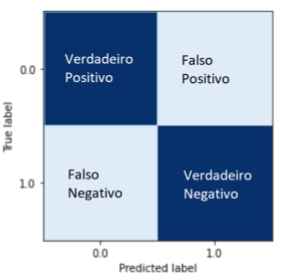

Ap√≥s a classifica√ß√£o dos elementos pela modelagem preditiva, os resultados da predi√ß√£o s√£o colocados em quatro diferentes quadrantes. Na diagonal principal (em azul escuro) est√£o os valores corretamente preditos, com Verdadeiros Positivos (VP) e Verdadeiros Negativos (VN). Fora dessa diagonal se encontram os erros cometidos, os Falsos Positivos (FN) e Falsos Negativos(FN) (Franceschi, 2019).

E a partir dos valores obtidos nos quadrantes, outras m√©tricas podem ser extra√≠das, como a acur√°cia, com a seguinte f√≥rmula:


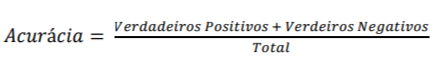

A acur√°cia √© uma m√©trica simples que utiliza a raz√£o entre todos os acertos do modelo (Verdadeiros Positivos e Verdadeiros Negativos) sobre a quantidade total de elementos usados na predi√ß√£o, ou seja, VP somado com VN, FP e FN.
E como a f√≥rmula n√£o utiliza um peso aplicado, √© importante ressaltar que apenas utilizando a acur√°cia n√£o √© poss√≠vel avaliar o desempenho dos modelos (Chen, et al, 2020).

#### 6.5.2 Resultados

In [ ]:
#Criando dataframe para os resultados gerados pelos modelos
dadosResultado = {
    'Acuracia': [acuraciaNaiveBow, acuraciaNaiveW2V, acuraciaRNW2V, acuraciaTranformers, accuracySVM],
    'Revoca√ß√£o': [revocacaoNaiveBow, revocacaoNaiveW2V, revocacaoRNW2V, revocacaoTranformers, revocacaoSVM],
}
nomesLinhas = ['Naive Bayes bag of words', 'Naive Bayes Word2Vec', 'Rede Neural Word2Vec', 'Tranformers', 'SVM']

tabelaResultados = pd.DataFrame(dadosResultado, index=nomesLinhas)

In [ ]:
#Visualiza√ß√£o dos resultados
tabelaResultados

Acuracia  Revoca√ß√£o
Naive Bayes bag of words  0.723191   0.713909
Naive Bayes Word2Vec      0.458805   0.352434
Rede Neural Word2Vec      0.642136   0.632992
Tranformers               0.765456   0.764755
SVM                       0.474725   0.454713

Como foi possivel observar acima, foram feitos 3 modelos para utiliza√ß√£o dos resultados de BOW e do Word2Vec. Sendo eles:

1.   6.1 - Naive Bayes bag of words, com 0.72 de acur√°cia.
2.   6.2 - Naive Bayes Word2Vec, com 0.5 de acur√°cia.
1.   6.3 - Rede Neural Word2Vec, com 0.649 de acur√°cia.


Vale mencionar que a principal metrica utilizada para medir o desenpenho dos modelo foi a acur√°cia.

#### 6.5.3 Matrizes de confus√£o

Abaixo esta a fun√ß√£o utilizada para plotar as matrizes:

In [ ]:
def plotarMatriz(matriz):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confus√£o")
    plt.xlabel(" valor previsto")
    plt.ylabel("Valor verdadeiro")
    plt.show()

Matriz de confus√£o do NaiveBayes com BOW:

In [ ]:
plotarMatriz(matrizNaiveBow)

Matriz de confus√£o do Naive Bayes com Word2Vec

In [ ]:
plotarMatriz(matrizNaiveW2V)

Matriz de confus√£o da Rede Neural com Word2Vec

In [ ]:
plotarMatriz(matrizRNW2V)

Matriz de confus√£o transformers

In [ ]:
plotarMatriz(matrizTransformers)

Matriz de confus√£o SVM

In [ ]:
plotarMatriz(matrizSVM)

Tamb√©m vale mencionar, que a rede Neural Word2VEC a matriz de confus√£o do modelo foi analisada, contendo 883 verdadeiros positivos, 628 falso positivos, 451 falso negativos e 1113 verdadeiros negativos. Indicando uma tend√™ncia do modelo a ter acertos mais precisos sobre coment√°rios negativos. Sendo esse um bom ind√≠cio, uma vez que essa √© a classe mais importante de ser corretamente classificada.

#### 6.5.4 Conclus√£o

Os resultados que tiveram os melhores resultados foram o do Naive Bayes com Bag of words e a rede neural com Word2Vec. Sendo o menor deles o Naive Bayes com Word2Vec, uma vez que ele n√£o e um input adequado para o modelo. 
Ja entre os dois modelos com maiores resultados, o que se destacou foi o Naive Bayes com bag of words, se destacando com 7% a mais de acur√°cia que a rede neural.
Tamb√©m sendo importante destacar a import√¢ncia da aplica√ß√£o de outras m√©tricas de avalia√ß√£o, como revoca√ß√£o, que identifica a rela√ß√£o entre Verdadeiros Positivos com Falsos Negativos.

### 6.6 Refer√™ncias

CHEN, D., NIGRI, E., OLIVEIRA, G.,SEPULVENE, L., ALVES, T.: M√©tricas de Avalia√ß√£o em Machine Learning: Classifica√ß√£o - Kunumi Blog, medium, 2020.

FRANCESCHI, P, R.: Modelagens Preditivas de Churn: O Caso do Banco do Brasil, Universidade do Vale do Rio dos Sinos, 2019.